<a id="home">Dalam studi kasus ini, anda akan mengimplementasi regresi linier dan melihatnya bekerja pada data. Studi kasus kali ini terdiri dari 2 bagian, yaitu:</a>

1. [Part I: Operasi Matriks](#operasi-matriks)
2. [Part II: Linear regression with one variable](#one-variable)
3. [Part III: Normal Equation](#normal-equation)

In [4]:
import numpy as np

In [6]:

A = np.array([[1,2], [1,3], [1,4]])
print(A)

[[1 2]
 [1 3]
 [1 4]]


# <a id="operasi-matriks">Part I: Operasi Matriks</a> (Back to [Home](#home))

Diketahui matriks `A` dan vektor `b` sebagai berikut:

In [7]:
A.shape


(3, 2)

In [17]:
A.ndim

2

In [23]:
b = np.array([[1],[2],[3]])
b

array([[1],
       [2],
       [3]])

In [16]:
b.shape

(3, 1)

In [19]:
b.ndim

2

Kita operasikan `A` dan `b` dengan operasi `*` sbb: 

In [10]:
A * b

array([[ 1,  2],
       [ 2,  6],
       [ 3, 12]])

## Pertanyaan Refleksi
1. Apakah yang terjadi apabila `A * b`? Coba ceritakan.
2. Apakah yang terjadi apabila `np.dot(A,b)`? Coba ceritakan.
3. Apakah yang terjadi apabila `np.dot(b.T,A)`? Coba ceritakan.    
4. Apakah yang terjadi apabila `b.T @ A`? Coba ceritakan.

**Petunjuk**: `b.T` adalah transpose dari vektor `b`. 

1. setiap baris 1 pada matriks A dikali dengan baris 1 pada matriks B sampe seterusnya
2. error, Karena pada perkalian matriks jumlah kolom pada matriks pertama harus sama dengan jumlah baris pada matriks kedua.
3. Bisa, karena pada matriks matriks b baris 3, kolom 1. dan pada a transpost yg tadinya (3,2) menajdi (2,3)
4. np.dot = @



In [12]:
np.dot(A,b)

ValueError: shapes (3,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

In [13]:
np.dot(b.T,A)

array([[ 6, 20]])

In [14]:
b.T @ A

array([[ 6, 20]])

Misalkan kita membuat vektor `c` sbb:

In [20]:
c_awal = np.array([1,2,3])
c_awal

array([1, 2, 3])

In [22]:
c_awal.shape

(3,)

In [24]:
c_akhir = c_awal[:, np.newaxis]
c_akhir

array([[1],
       [2],
       [3]])

In [25]:
c_awal.shape

(3,)

## Pertanyaan Refleksi
1. Berapakah dimensi dari `c_awal`?
2. Berapakah dimensi dari `c_akhir`?

# <a id="one-variable">Part II :Linear regression with one variable</a> (Back to [Home](#home))

![](images/food-truck.jpg)

Pada bagian latihan ini, anda akan menerapkan regresi linier dengan satu variabel untuk memprediksi keuntungan truk makanan. Misalkan anda adalah CEO dari waralaba restoran dan sedang mempertimbangkan berbagai kota untuk membuka gerai baru. Waralaba ini sudah memiliki truk di berbagai kota dan anda memiliki data untuk keuntungan dan populasi dari kota-kota tersebut.

Anda ingin menggunakan data ini untuk membantu anda memilih kota mana yang akan menjadi tujuan ekspansi bisnis berikutnya.   
File `ex1data1.txt` berisi kumpulan data untuk masalah regresi linier kita.     
- Kolom pertama adalah **jumlah penduduk suatu kota** dan 
- kolom kedua adalah **keuntungan dari truk makanan di kota tersebut**.    

_Nilai negatif untuk keuntungan menunjukkan kerugian_.

Kita import _library-library_ yang dibutuhkan. 

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Plot the Data 
Mari kita plot datanya terlebih dulu ya.

In [63]:
def plot_data(x, y):
    # ===================== Write Your Code Here =====================
    # Instruksi : Plot data training menjadi gambar menggunakan matplotlib.pyplot
    #             dengan menggunakan fungsi "plt.scatter". Atur label sumbu menggunakan
    #             "plt.xlabel" dan "plt.ylabel". Asumsikan masing-masing populasi dan data pendapatan
    #             sebagai label untuk sumbu x dan y.
    # Hint :      Anda dapat menggunakan parameter 'marker' di fungsi "plt.scatter" untuk mengubah jenis marker (mis. "x", "o").
    # Selanjutnya, anda dapat mengubah warna marker dengan parameter 'c'.
    plt.scatter(x, y, marker='x',c='c')
  

    
    

Plotting Data...


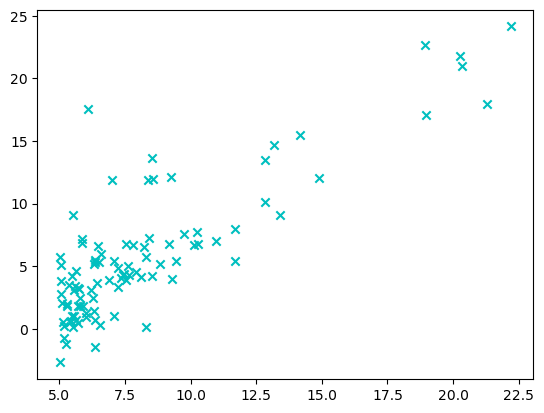

In [64]:
print('Plotting Data...')
data = np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0, 1))
X = data[:, 0]
y = data[:, 1]
m = y.size

plt.ion()
plt.figure(0)
plot_data(X, y)


In [76]:
y.ndim

1

## Gradient Descent

Seperti yang sudah dijelaskan di kelas, MSE _cost function_ untuk model regresi linier adalah

$$
    \text{MSE}(\mathbf{X}, h_\mathbf{\theta}) = \frac{1}{2m} \sum_{i=1}^{m}{(\mathbf{\theta}^\intercal \mathbf{x}^{(i)} - y^{(i)})^2} 
$$

dengan   
$m$      = jumlah training data    
$\mathbf{\theta}$ = parameter model regresi linier    
$\mathbf{x}^{(i)}$ = training data ke-$i$     
$y^{(i)}$ = label data ke-$i$     
$\mathbf{X}$ = matriks desain    
$h_{\theta}$ = hipotesis.

### Pertanyaan Refleksi
1. Apakah $\mathbf{x}^{(i)}$ merupakan vektor? Jika vektor, berapakah dimensi vektor tersebut?
2. Apakah $y^{(i)}$ merupakan vektor? Jika vektor, berapakah dimensi vektor tersebut?
3. Berapakah dimensi dari matriks desain, $\mathbf{X}$?
4. Apakah $\theta$ merupakan vektor? Jika vektor, berapakah dimensi vektor tersebut?
5. Apakah isi dari $h_{\theta}$ dalam kasus ini?

answer:
1. 97,1
2. 97.1
3. 

In [67]:
def compute_cost(X, y, theta):
    # Initialize some useful values
    m = y.size
    cost = 0
    

    # ===================== Write Your Code Here =====================
    # Instruksi : Hitung cost dari pilihan theta tertentu.
    # Anda harus menghitung MSE cost berdasarkan formula di atas.
    # 
    # Hint: Gunakan bentuk matriks dan perkalian matriks

    hasilKali = np.dot(theta.T,X)
    selish = hasilKali - y
    cost = np.sum(np.square(selish)) / (2 * m)
  
    

    return cost

Kita sudah belajar bahwa dalam algoritma batch gradient descent, setiap iterasi melakukan proses update sebagai berikut:

$$
    \theta_j = \theta_j - \eta \frac{1}{m} \sum_{i=1}^m{(\mathbf{\theta}^\intercal \mathbf{x}^{(i)}-y^{(i)})x_j^{(i)}
   }
$$
Selanjutnya, dalam bentuk matriks
$$
    \theta = \theta - \frac{\alpha}{m} \times \texttt{np.sum}(\mathbf{X} * \texttt{error}) 
$$
dengan 
$$
    \texttt{error} = \texttt{np.dot(X, theta).flatten() - y}
$$


In [ ]:
def gradient_descent(X, y, theta, eta, num_iters):
    # Inisialisasi beberapa variabel
    m = y.size
    MSE_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        # ===================== Write Your Code Here =====================
        # Instruksi : Lakukan satu langkah gradient descent pada parameter vektor theta
        
        #
        # Hint: X.shape = (97, 2), y.shape = (97, ), theta.shape = (2, )
        
        # Hitunglah error
        
        error=np.dot(X,theta).flatten()-y
        
        # Hitunglah theta
        
        

        # Hitunglah cost dengan memanggil compute_cost dengan theta yang sudah dihitung
        # Simpan hasil perhitungan cost ke dalam J_history[i]
        MSE_history[i] = compute_cost(X, y, theta)

    return theta, MSE_history
    

In [ ]:
print('Running Gradient Descent...')

X = np.c_[np.ones(m), X]  # Add a column of ones to X
theta = np.zeros(2)  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
eta = 0.01

# Compute and display initial cost
print('Initial cost : ' + str(compute_cost(X, y, theta)) + ' (This value should be about 32.07)')

theta, MSE_history = gradient_descent(X, y, theta, eta, iterations)

print('Theta found by gradient descent: ' + str(theta.reshape(2)))

# Plot the linear fit
plt.figure(0)
line1, = plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')
plt.scatter(data[:, 0], data[:, 1], c='r', marker="x")
plt.xlabel('population')
plt.ylabel('profit')

plt.legend(handles=[line1])

In [ ]:
# Memprediksi profit untuk jumlah populasi 35,000 dan 70,000
# Supaya bilangannya tidak terlalu besar, kita gunakan puluh ribuan, jadi 35,000 menjadi 3.5 
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:0.3f} (This value should be about 4519.77)'.format(
    predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:0.3f} (This value should be about 45342.45)'.format(
    predict2*10000))

In [ ]:
print('Visualizing MSE(theta0, theta1) ...')

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
MSE_vals = np.zeros(xs.shape)

# Fill out MSE_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        MSE_vals[i][j] = compute_cost(X, y, t)

MSE_vals = np.transpose(MSE_vals)

fig1 = plt.figure(1)
ax = fig1.add_subplot(projection='3d')
ax.plot_surface(xs, ys, MSE_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, MSE_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

## Pertanyaan Refleksi
1. Di manakah kira-kira nilai $\theta_0$ dan $\theta_1$ di contour?
2. Apakah yang dapat anda simpulkan mengenai posisi $\theta_0$ dan $\theta_1$ di contour tersebut?

# <a id="normal-equation">Part III: Normal Equation</a> (Back to [Home](#home))

Dalam part III, kita akan menggunakan _Normal Equation_, yaitu:
$$
    \hat{\theta} = (\mathbf{X}^\intercal \mathbf{X})^{-1} \mathbf{X}^\intercal \mathbf{y} 
$$
dengan
- $\hat{\theta}$ adalah nilai $\theta$ yang meminimumkan MSE cost function.
- $\mathbf{y}$ adalah vektor yang berisi nilai target dari $y^{(1)}$ sampai dengan $y^{(m)}$.

untuk memprediksi harga rumah.    
Misalkan anda menjual rumah anda dan anda ingin tahu berapa harga pasar yang bagus.    
Salah satu cara untuk melakukan ini adalah dengan terlebih dahulu mengumpulkan informasi tentang rumah yang dijual baru-baru ini dan membuat model harga rumah.    

File `ex1data2.txt` berisi harga rumah-rumah di Portland, Oregon.    
Kolom pertama adalah ukuran rumah (dalam square feet), kolom kedua adalah jumlah kamar tidur, dan kolom ketiga adalah harga rumah.

In [79]:
def normal_eqn(X, y):
    theta = np.zeros((X.shape[1], 1))

    # ===================== Write Your Code Here =====================
    # Instruksi : Lengkapi kode untuk menghitung theta dengan menggunakan
    #                persamaan di atas kemudian hasilnya disimpan dalam theta
    
    #
   
    invers=np.linalg.inv(np.dot(X.T,X))
    theta=np.dot((np.dot(invers,X.T)),y)
    

    return theta

In [81]:
print('Solving with normal equations ...')

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]
m = y.size
n
# Add intercept term to X
X = np.c_[np.ones(m), X]

theta = normal_eqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations : \n{}'.format(theta))


# Estimate the price of a 1650 sq-ft, 3 br house
# ===================== Write Your Code Here =====================
price = 0  # You should change this
predict = np.dot(np.array([1, 1650]), theta)# Write Your Code
price2 =price*predict # Write Your Code

Solving with normal equations ...
Theta computed from the normal equations : 
[89597.9095428    139.21067402 -8738.01911233]


ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [ ]:
print(f"Jadi harga prediksi rumah adalah ${round(price)}")

<center><h1>The End</h1></center>